## Electric Vehicles Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
df = pd.read_csv(r"C:\Users\vigne\Downloads\dataset.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [4]:
# Knowing how many rows and columns in the given dataset
df.shape

(112634, 17)

In [5]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
# Renaming the columns
df.columns = df.columns.str.strip()
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
df.rename(columns={'Electric Vehicle Type':'EV Type'}, inplace=True)
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'EV Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'CAFV Eligibility'}, inplace=True)
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'EV Type', 'CAFV Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [9]:
# Converting Datatype of Year Column
df['Model Year'] = pd.to_datetime(df['Model Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   VIN (1-10)            112634 non-null  object        
 1   County                112634 non-null  object        
 2   City                  112634 non-null  object        
 3   State                 112634 non-null  object        
 4   Postal Code           112634 non-null  int64         
 5   Model Year            112634 non-null  datetime64[ns]
 6   Make                  112634 non-null  object        
 7   Model                 112614 non-null  object        
 8   EV Type               112634 non-null  object        
 9   CAFV Eligibility      112634 non-null  object        
 10  Electric Range        112634 non-null  int64         
 11  Base MSRP             112634 non-null  int64         
 12  Legislative District  112348 non-null  float64       
 13 

In [10]:
# Remove rows with missing values
df_dropna = df.dropna()
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   VIN (1-10)            112152 non-null  object        
 1   County                112152 non-null  object        
 2   City                  112152 non-null  object        
 3   State                 112152 non-null  object        
 4   Postal Code           112152 non-null  int64         
 5   Model Year            112152 non-null  datetime64[ns]
 6   Make                  112152 non-null  object        
 7   Model                 112152 non-null  object        
 8   EV Type               112152 non-null  object        
 9   CAFV Eligibility      112152 non-null  object        
 10  Electric Range        112152 non-null  int64         
 11  Base MSRP             112152 non-null  int64         
 12  Legislative District  112152 non-null  float64       
 13  DOL 

## 1. Univariate Analysis :

### Non Visual Univariate Analysis :

In [11]:
numerical_columns = ['Postal Code', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
categorical_columns = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'EV Type', 'CAFV_Eligibility', 'Vehicle Location', 'Electric Utility']

discrete_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [12]:
# Calling a function
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("-"*10, col_name, "-"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [13]:
discrete_univariate_analysis(discrete_df)

---------- VIN (1-10) ----------
count                                                 112634
nunique                                                 7548
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
Name: VIN (1-10), dtype: object
Value Counts: 
 VIN (1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
KNDJX3AE5F      1
YV4BR0PM1J      1
KMHE14L28H      1
WA1LABGE0N      1
WA1F2BFY9N      1
Name: count, Length: 7548, dtype: int64

---------- County ----------
count                                                 112634
nunique                                                  165
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
Value Counts: 
 County
King           59000
Snohomish      12434
Pierce          8535
Clark           6689
Thurston        4126
               ...  
St. Tammany        1
Bryan              1
Dorchester         1
Williams           1
Kootenai     

In [14]:
# Calling another function
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("-"*10, col_name, "-"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [15]:
numerical_univariate_analysis(numerical_df)

---------- Postal Code ----------
min        1730.000000
max       99701.000000
mean      98156.226850
median    98119.000000
std        2648.733064
Name: Postal Code, dtype: float64

---------- Electric Range ----------
min         0.000000
max       337.000000
mean       87.812987
median     32.000000
std       102.334216
Name: Electric Range, dtype: float64

---------- Base MSRP ----------
min            0.000000
max       845000.000000
mean        1793.439681
median         0.000000
std        10783.753486
Name: Base MSRP, dtype: float64

---------- Legislative District ----------
min        1.000000
max       49.000000
mean      29.805604
median    34.000000
std       14.700545
Name: Legislative District, dtype: float64

---------- DOL Vehicle ID ----------
min       4.777000e+03
max       4.792548e+08
mean      1.994567e+08
median    1.923896e+08
std       9.398427e+07
Name: DOL Vehicle ID, dtype: float64

---------- 2020 Census Tract ----------
min       1.101001e+09
max       5

### Visual Univariate Analysis :

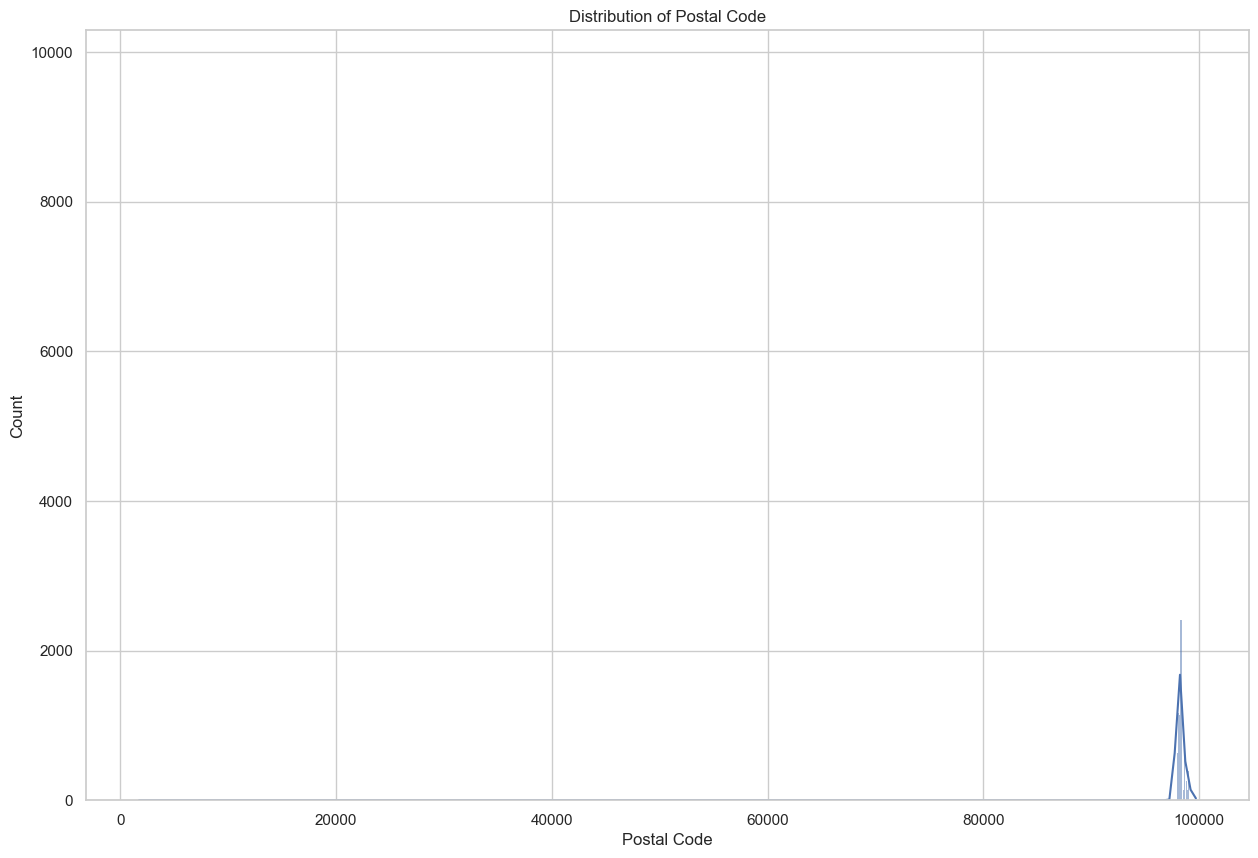

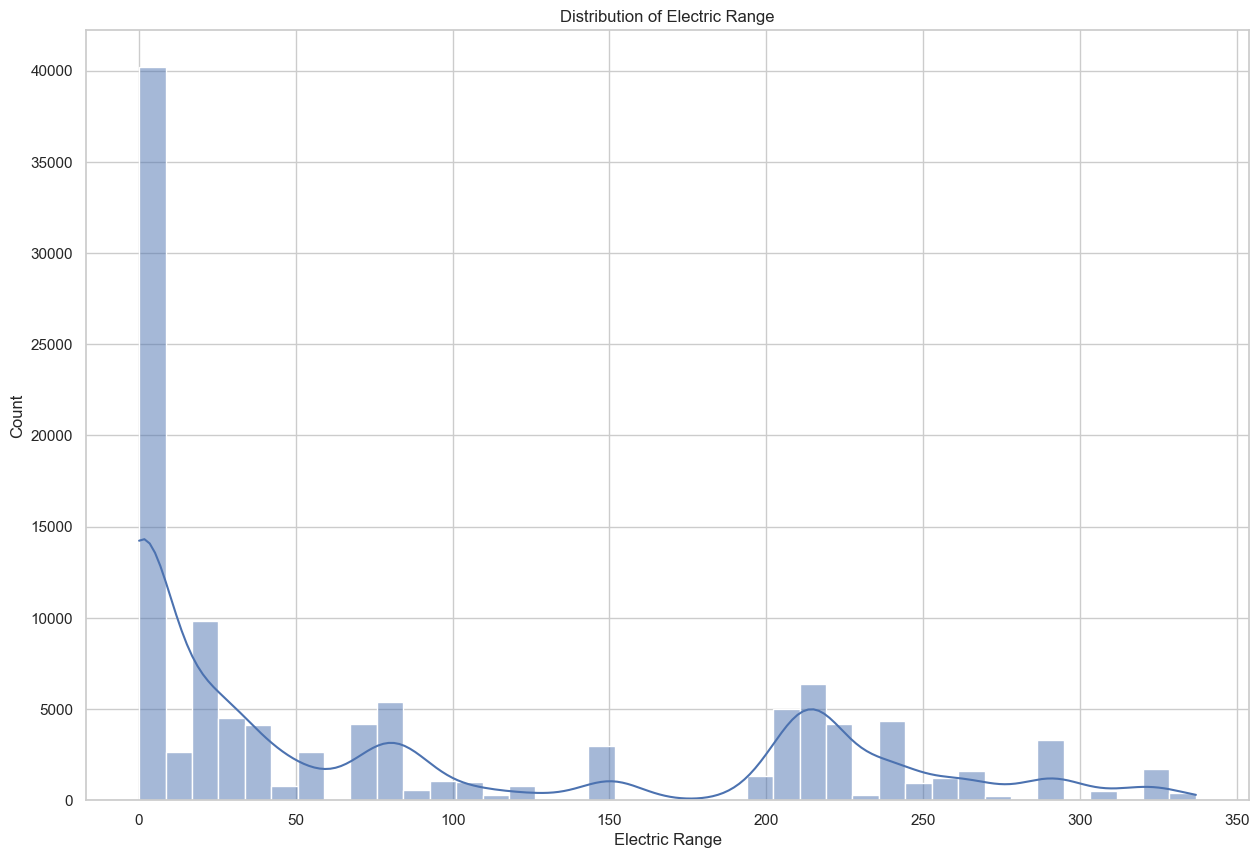

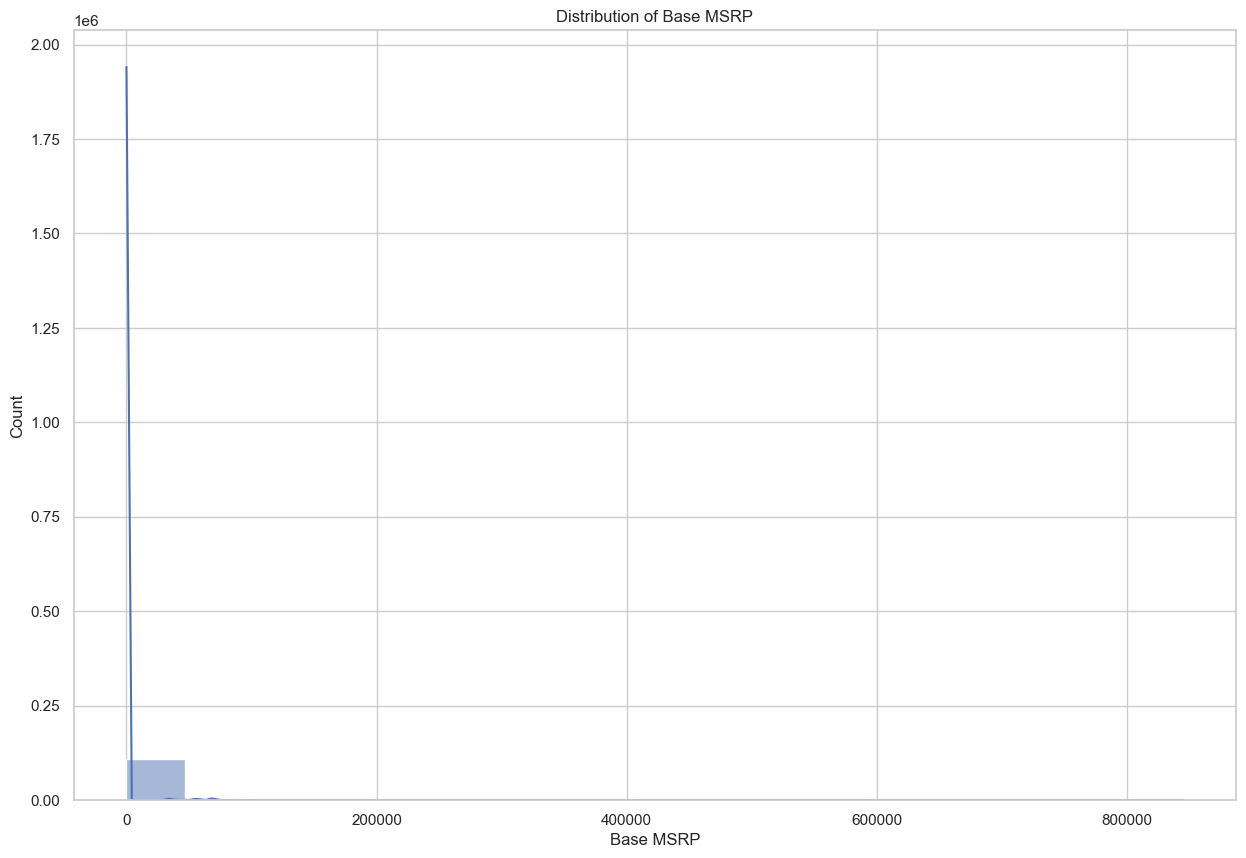

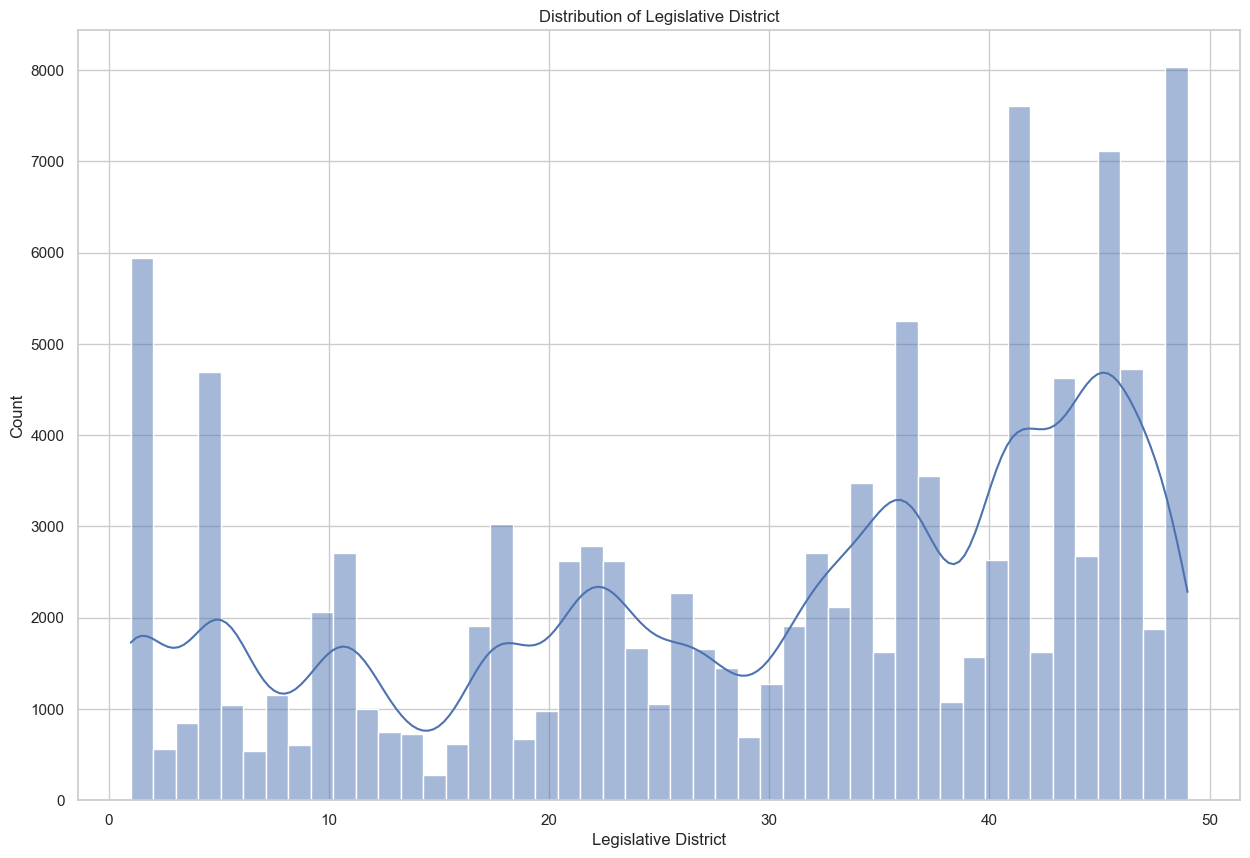

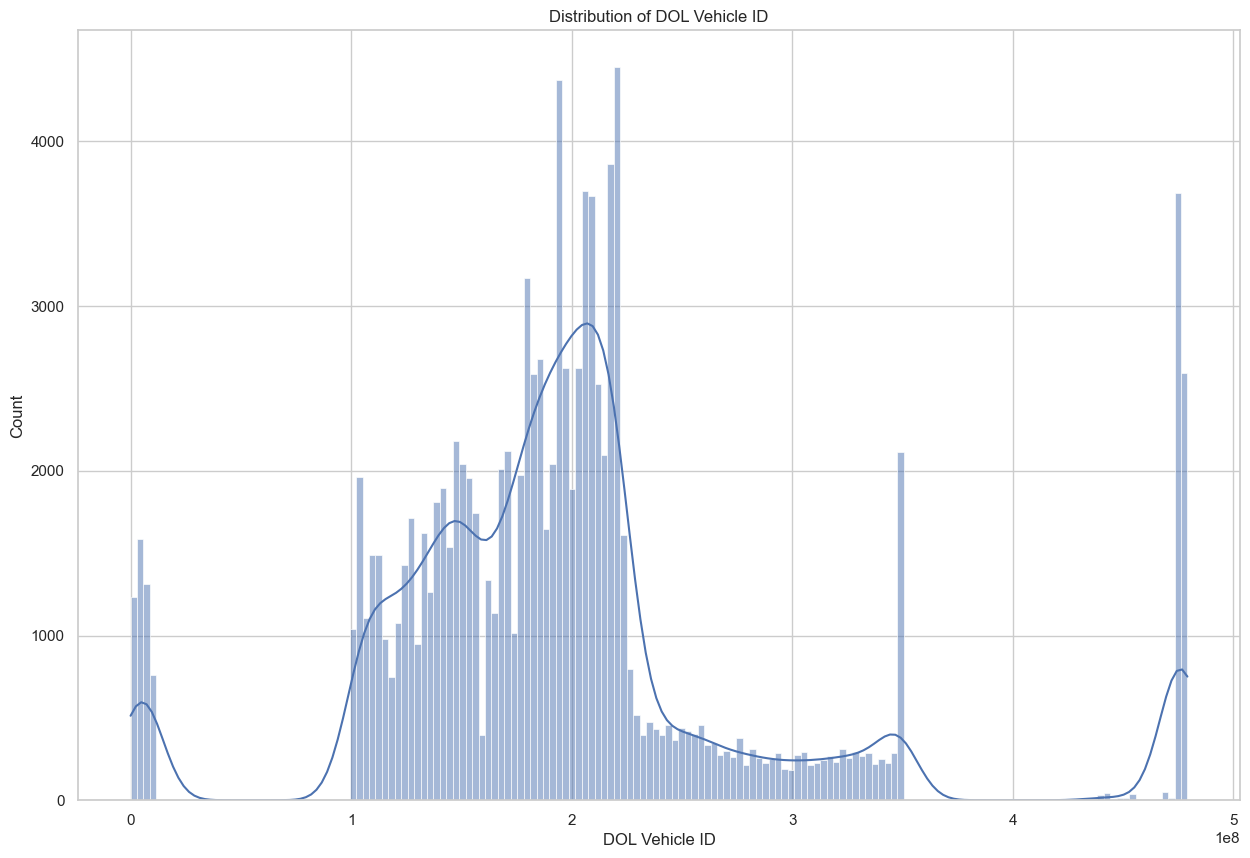

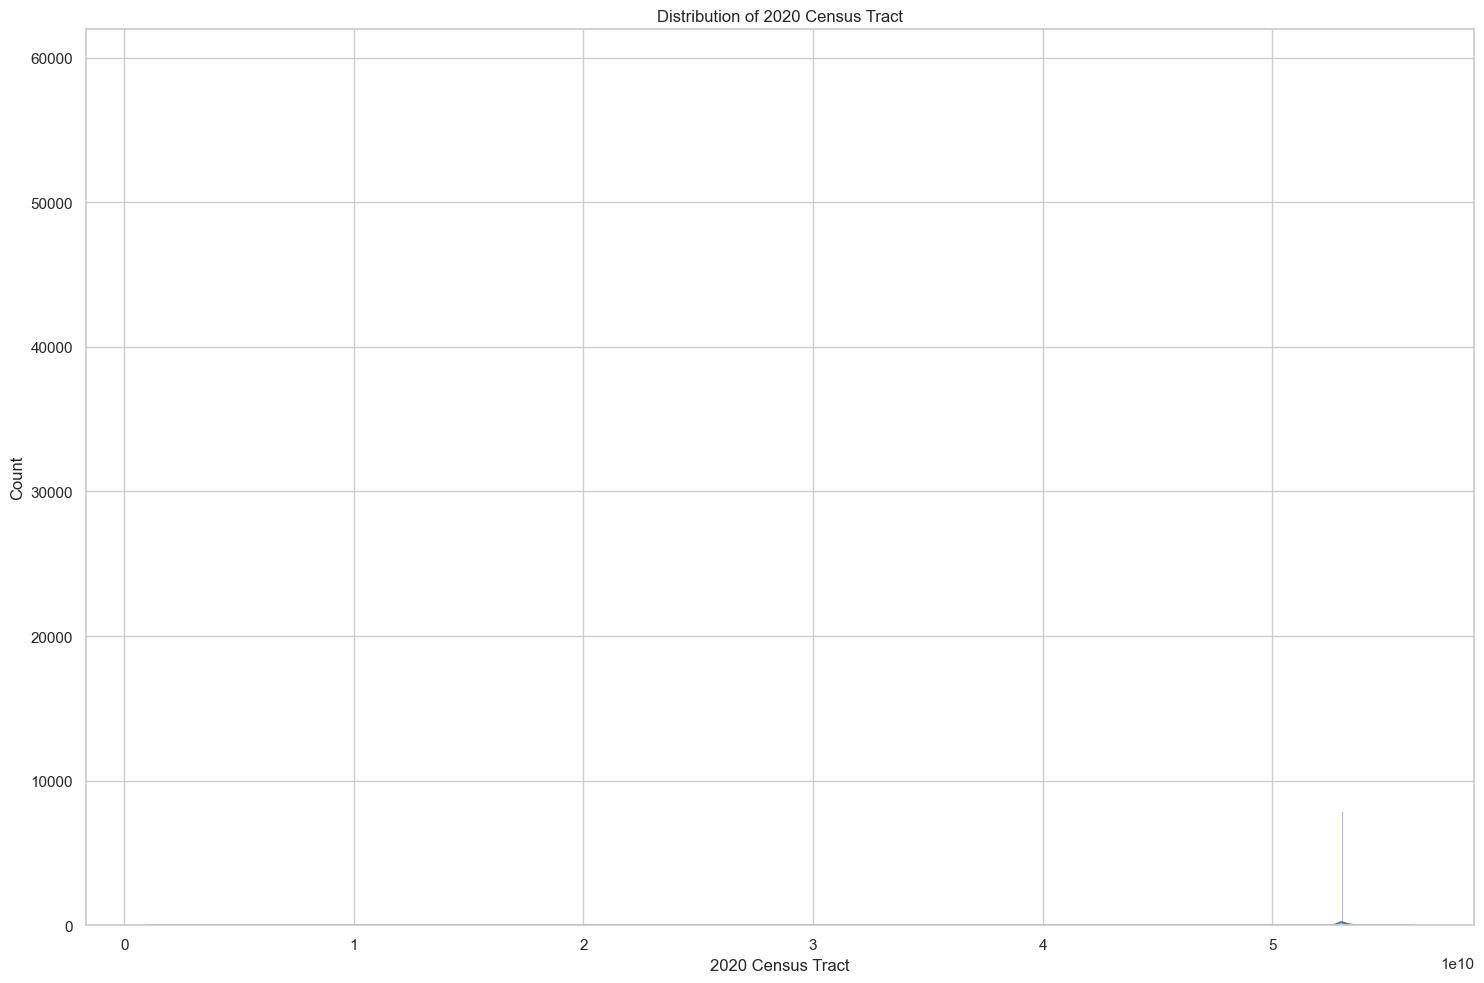

In [16]:
sns.set(style="whitegrid") # Univariate Analysis: Distribution of Numerical Columns

# Plot histograms for numerical columns

for column in numerical_columns:
    plt.figure(figsize=(15, 10))

    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   VIN (1-10)            112634 non-null  object        
 1   County                112634 non-null  object        
 2   City                  112634 non-null  object        
 3   State                 112634 non-null  object        
 4   Postal Code           112634 non-null  int64         
 5   Model Year            112634 non-null  datetime64[ns]
 6   Make                  112634 non-null  object        
 7   Model                 112614 non-null  object        
 8   EV Type               112634 non-null  object        
 9   CAFV Eligibility      112634 non-null  object        
 10  Electric Range        112634 non-null  int64         
 11  Base MSRP             112634 non-null  int64         
 12  Legislative District  112348 non-null  float64       
 13 

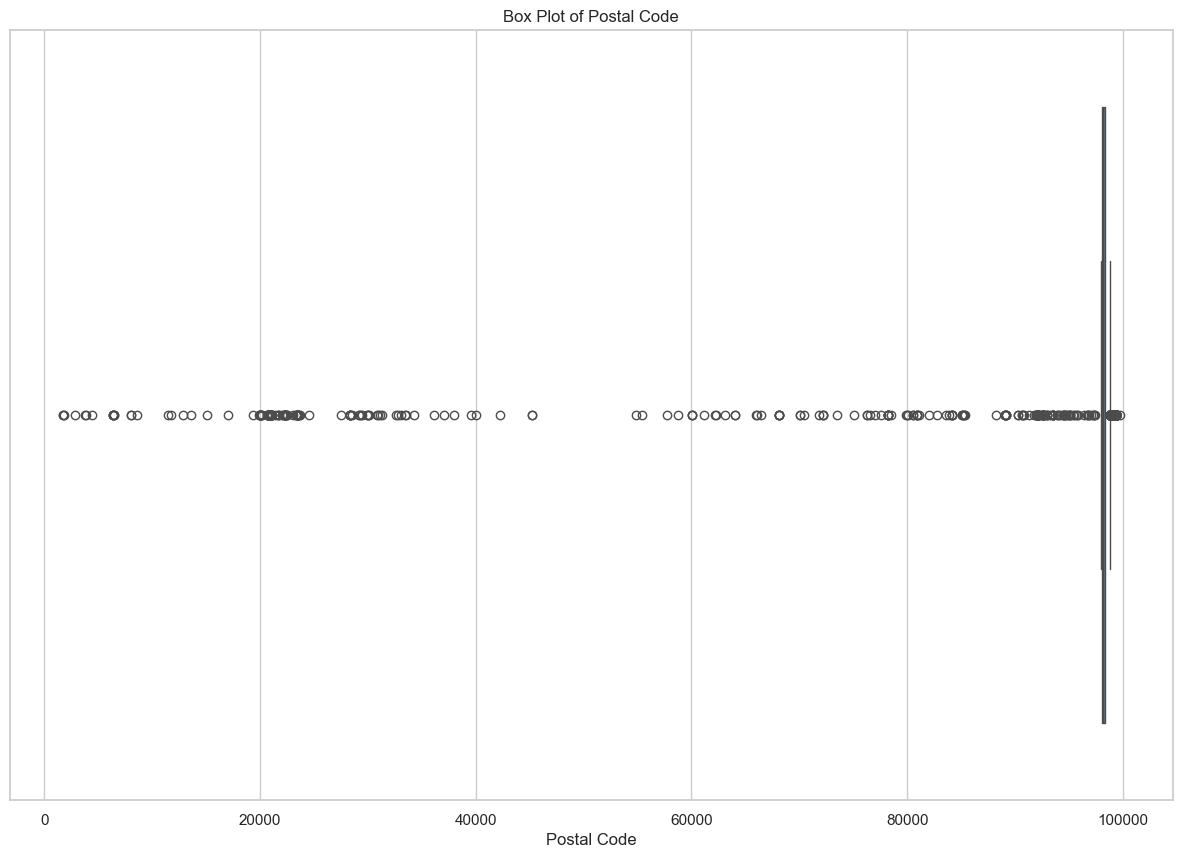

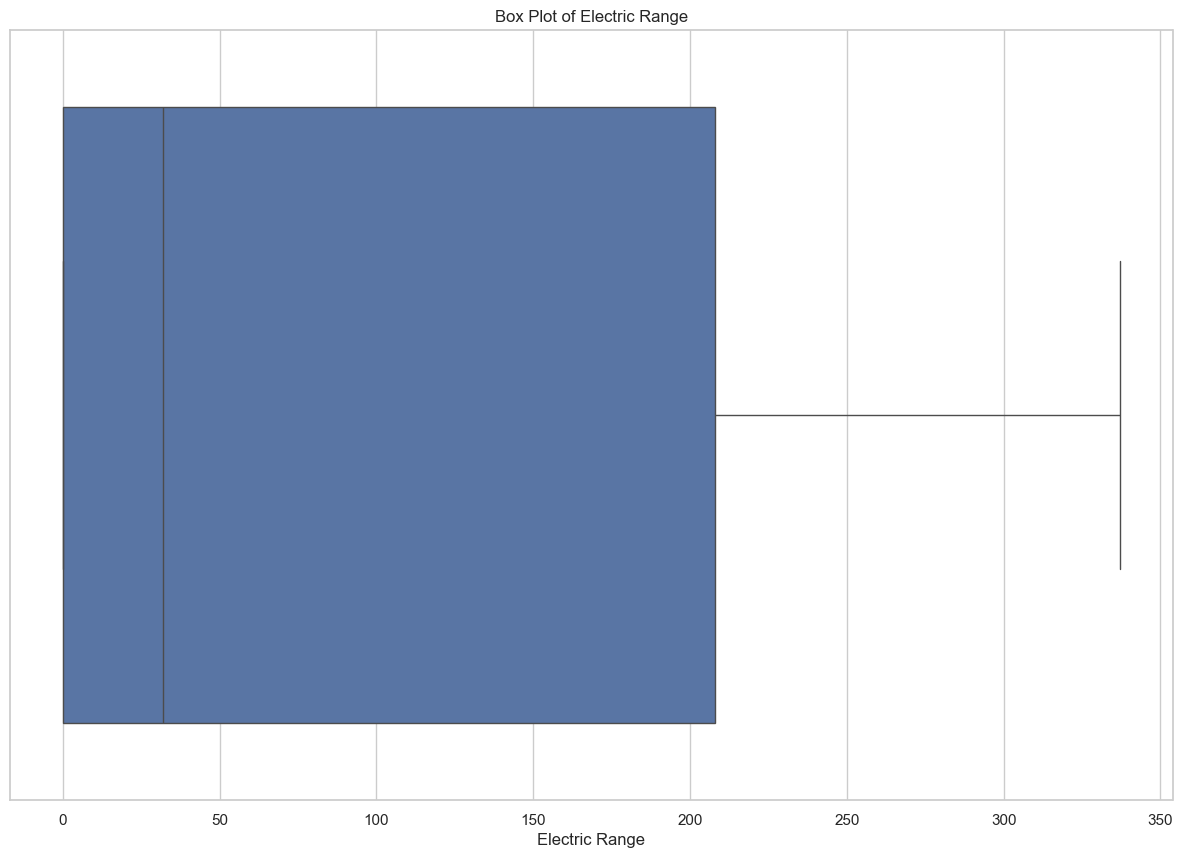

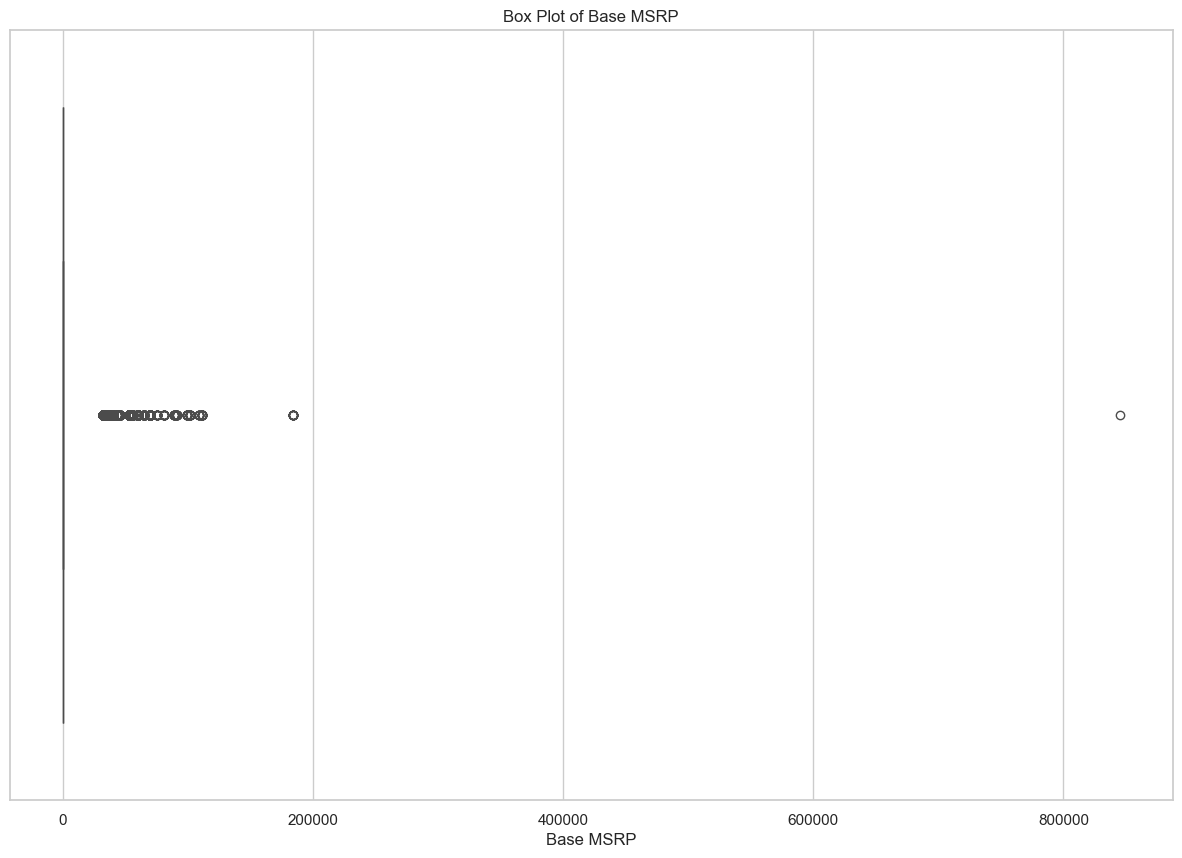

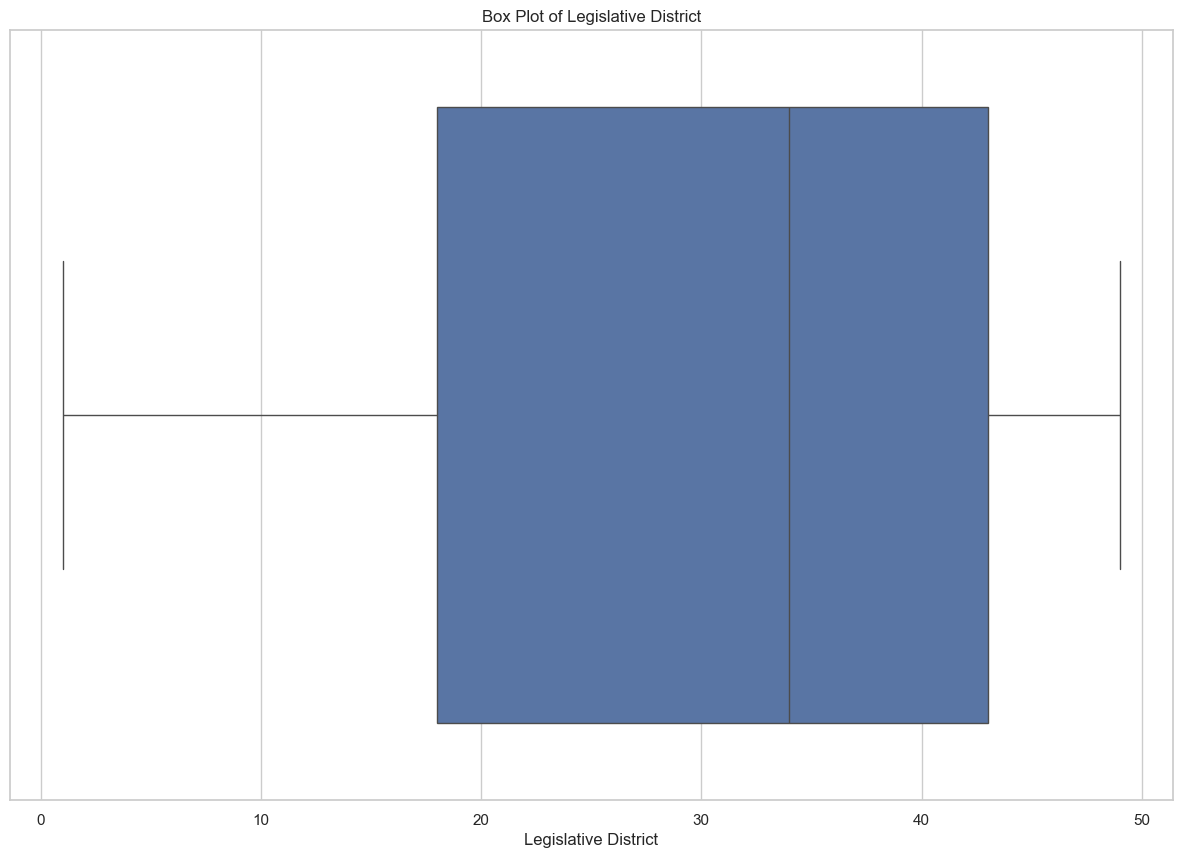

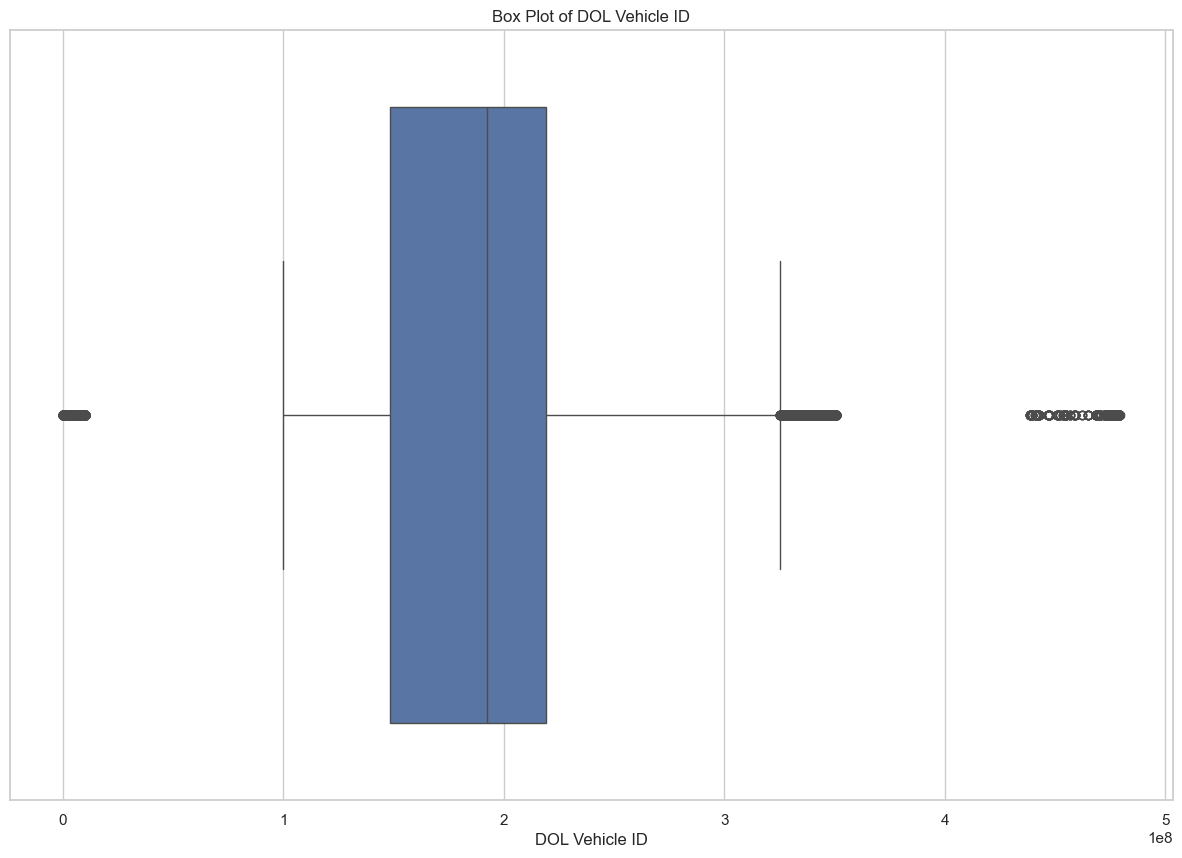

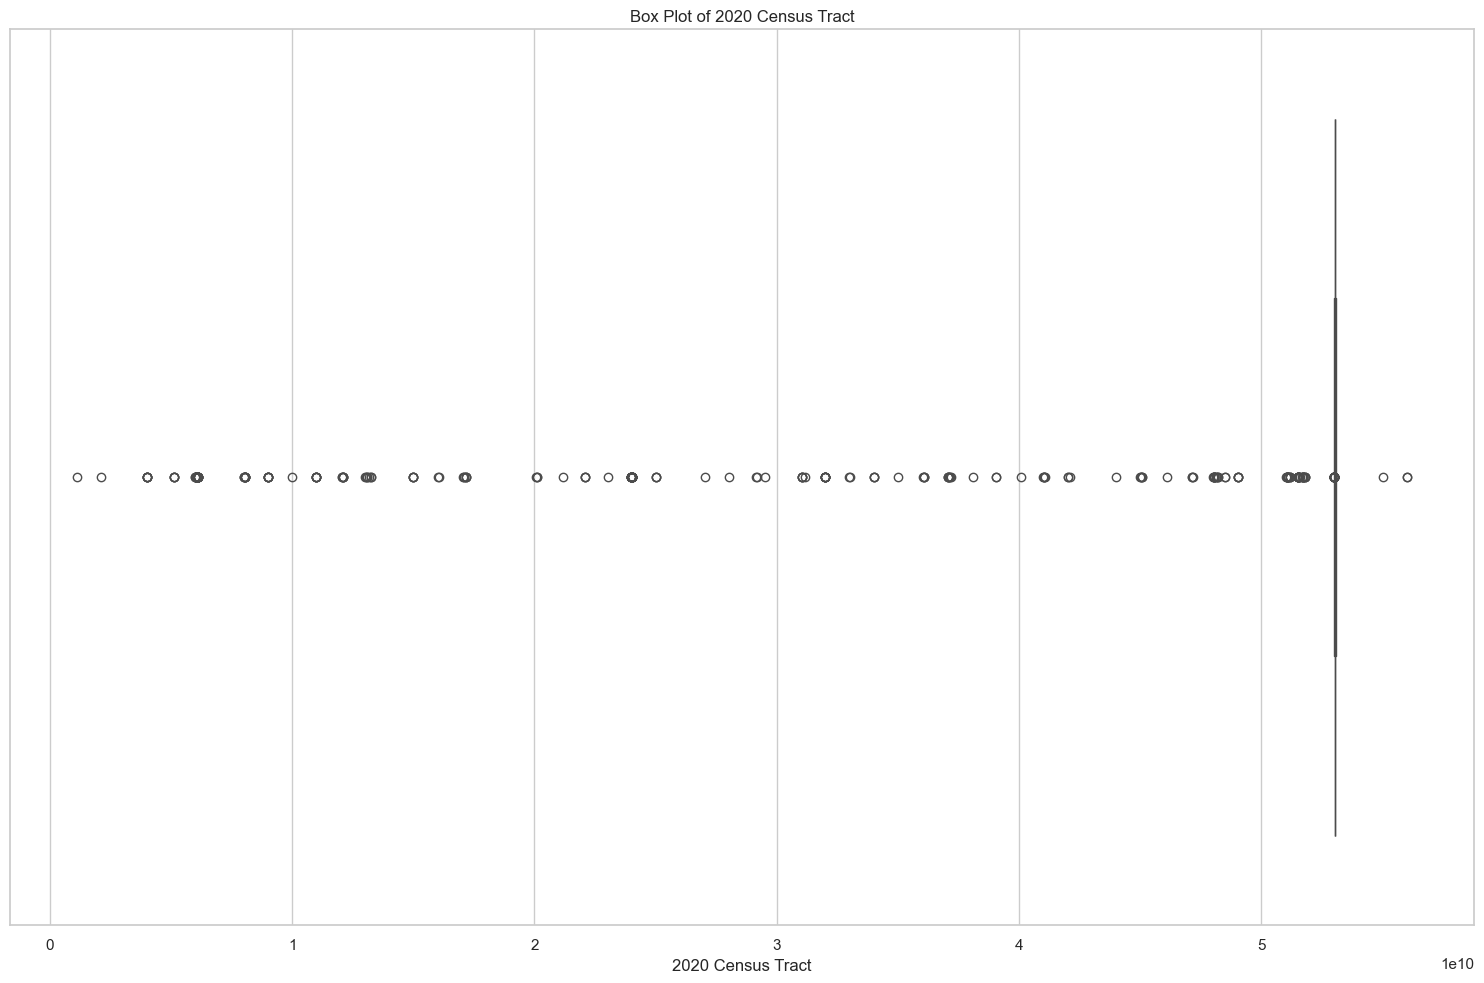

In [18]:
# Box plots for numerical columns

for column in numerical_columns:
    plt.figure(figsize=(15, 10))

    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [19]:
def describe_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\
Column: {column}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Range of outliers: {outliers[column].min()} to {outliers[column].max()}")
    print(f"Range of non-outliers: {df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].min()} to {df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].max()}")

for column in numerical_columns:
    describe_outliers(df, column)

Column: Postal Code
Number of outliers: 6858
Percentage of outliers: 6.09%
Range of outliers: 1730 to 99701
Range of non-outliers: 98001 to 98847
Column: Electric Range
Number of outliers: 0
Percentage of outliers: 0.00%
Range of outliers: nan to nan
Range of non-outliers: 0 to 337
Column: Base MSRP
Number of outliers: 3512
Percentage of outliers: 3.12%
Range of outliers: 31950 to 845000
Range of non-outliers: 0 to 0
Column: Legislative District
Number of outliers: 0
Percentage of outliers: 0.00%
Range of outliers: nan to nan
Range of non-outliers: 1.0 to 49.0
Column: DOL Vehicle ID
Number of outliers: 15538
Percentage of outliers: 13.80%
Range of outliers: 4777 to 479254772
Range of non-outliers: 100021575 to 325351799
Column: 2020 Census Tract
Number of outliers: 320
Percentage of outliers: 0.28%
Range of outliers: 1101001400 to 56033000100
Range of non-outliers: 53003960100 to 53077940007


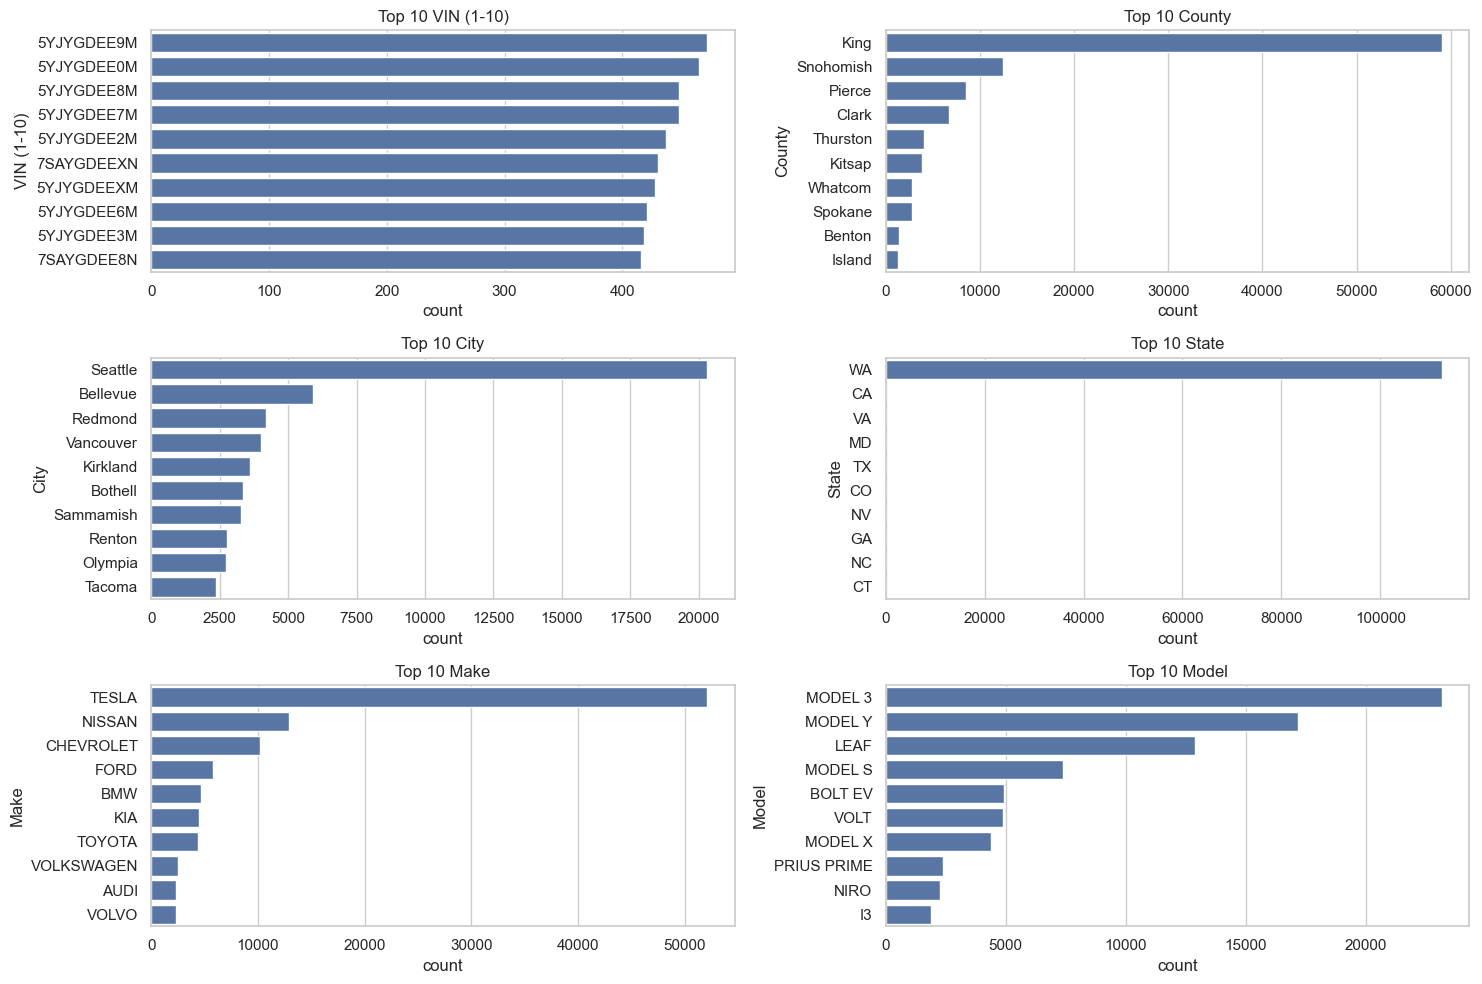

In [20]:
# Plot bar charts for categorical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns[:6], 1):  # Limiting to first 6 for clarity
    plt.subplot(3, 2, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index[:10])
    plt.title(f'Top 10 {column}')
plt.tight_layout()
plt.show()
     

### 2. Bivariate Analysis :

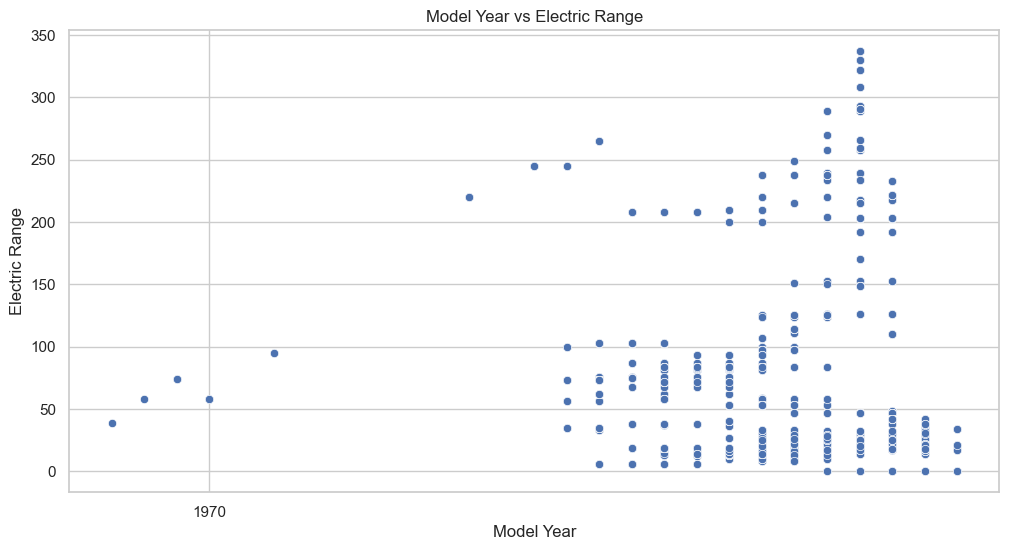

In [21]:
# 1. Relationship between Model Year and Electric Range
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=df)
plt.title('Model Year vs Electric Range')
plt.show()

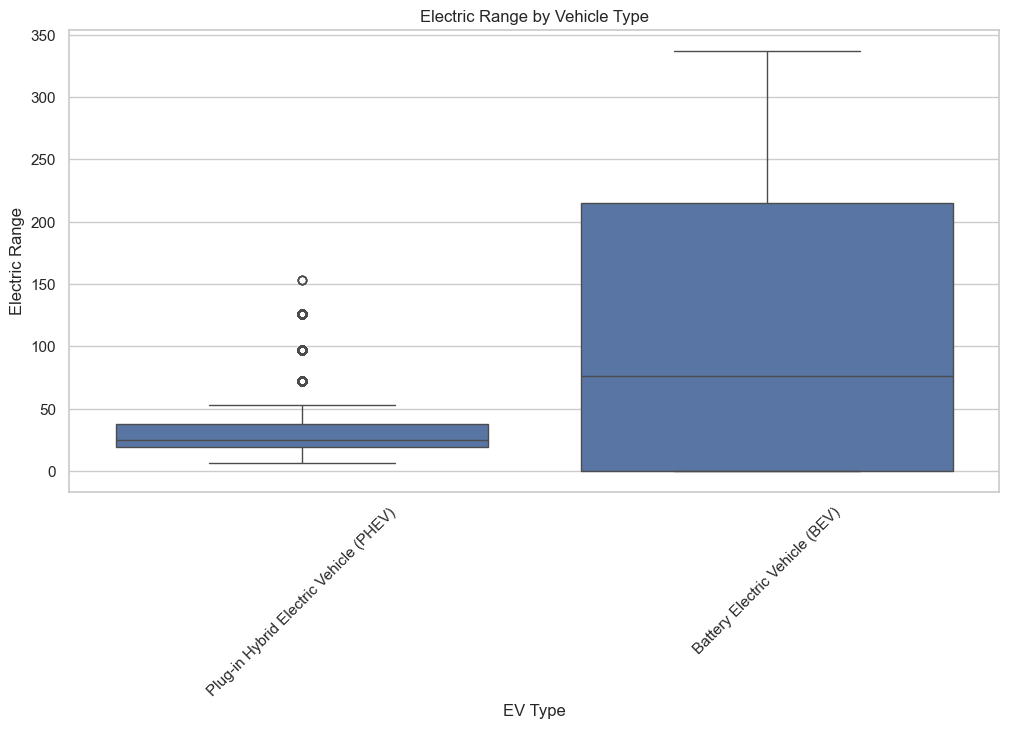

In [22]:
# 2. Comparison of Electric Range across different Electric Vehicle Types
plt.figure(figsize=(12, 6))
sns.boxplot(x='EV Type', y='Electric Range', data=df)
plt.title('Electric Range by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

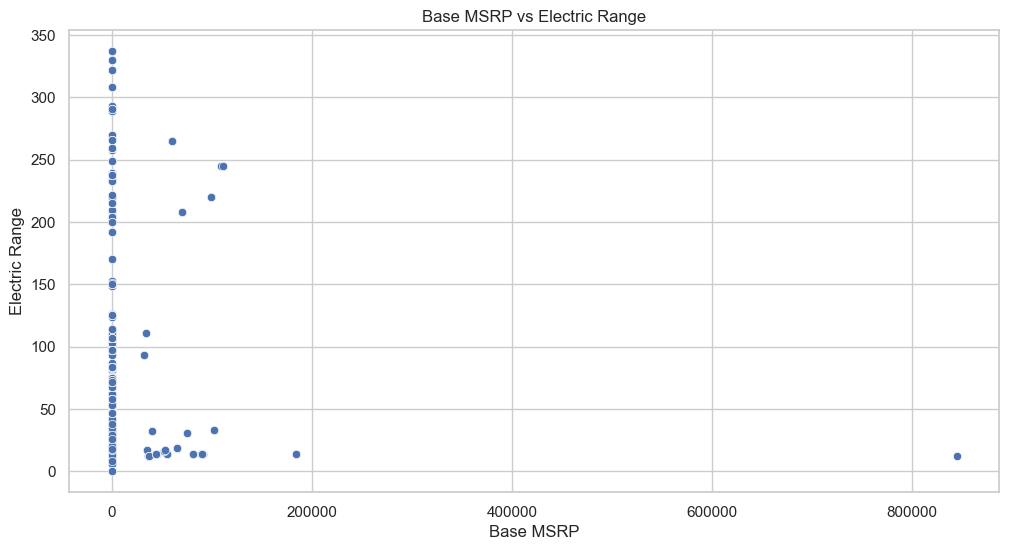

In [23]:
# 3. Correlation between Electric Range and Base MSRP
if df['Base MSRP'].sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
    plt.title('Base MSRP vs Electric Range')
    plt.show()
else:
    print("Base MSRP column contains only zero values. Skipping this analysis.")


C:\Users\vigne\AppData\Local\Temp\ipykernel_24848\509569749.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 2500x800 with 0 Axes>

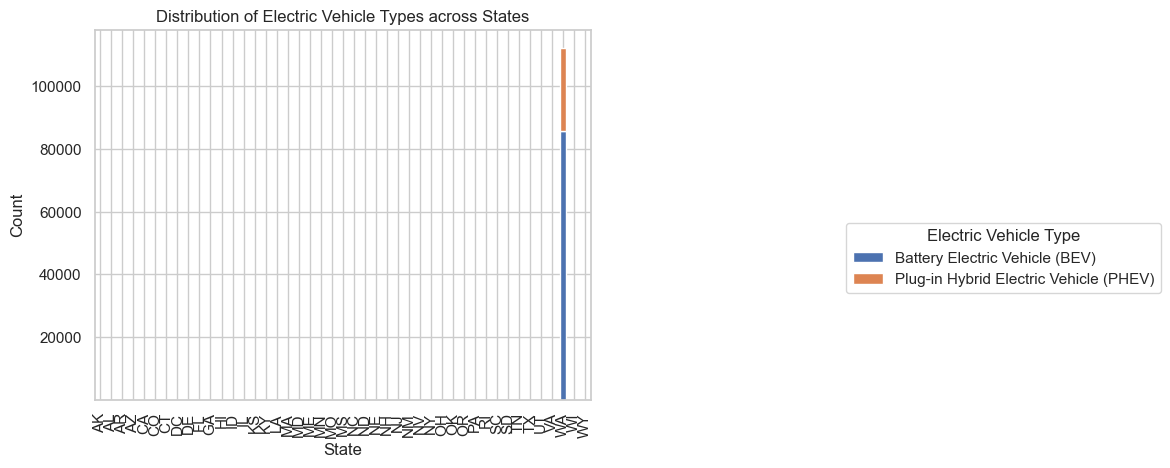

In [24]:
# 4. Distribution of Electric Vehicle Types across different States
vehicle_type_by_state = df.groupby('State')['EV Type'].value_counts().unstack()
plt.figure(figsize=(25, 8))
vehicle_type_by_state.plot(kind='bar', stacked=True)
plt.title('Distribution of Electric Vehicle Types across States')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type', bbox_to_anchor=(1.5, 0.5), loc='upper left')
plt.tight_layout()
plt.show()

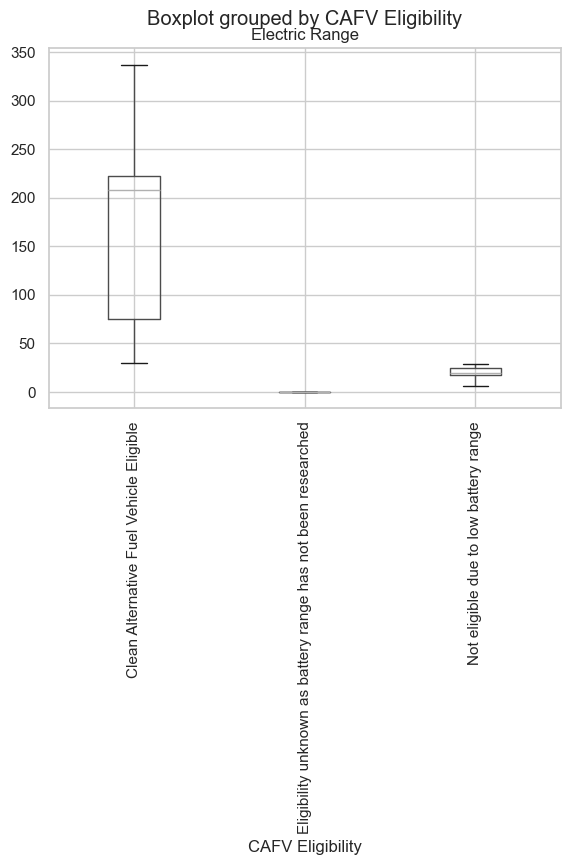

In [25]:
#5. Assuming 'df' is your DataFrame
df.boxplot(by="CAFV Eligibility", column=['Electric Range'])

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()
     


So, This is a basic EDA for the given dataset.

## 3. Creating a Choropleth

In [26]:
##pip install plotly

In [27]:
##pip install --upgrade nbformat

In [28]:
import plotly.express as px
ev_count_by_state = df.groupby('State').size().reset_index(name='Number_of_EV_Vehicles')
ev_count_by_state

,State,Number_of_EV_Vehicles
0,AK,1
1,AL,1
2,AR,4
3,AZ,6
4,CA,76
5,CO,9
6,CT,6
7,DC,6
8,DE,1
9,FL,6


In [29]:
# Count the number of EVs per state
ev_count_by_state = df['State'].value_counts().reset_index()
ev_count_by_state.columns = ['State', 'EV_Count']


In [30]:
# Create the Choropleth map
fig = px.choropleth(ev_count_by_state,
                    locations='State',
                    locationmode="USA-states",
                    color='EV_Count',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Number of Electric Vehicles by State")

In [ ]:
# Update the layout
fig.update_layout(
    title_x=0.05,
    geo_scope='usa',
)

fig.show()

In [32]:
# Save the plot as an HTML file
fig.write_html("ev_choropleth_map.html")

print("Choropleth map has been created and saved as 'ev_choropleth_map.html'.")
print("Top 5 states by EV count:")
print(ev_count_by_state.head().to_string(index=False))

Choropleth map has been created and saved as 'ev_choropleth_map.html'.
Top 5 states by EV count:
State  EV_Count
   WA    112348
   CA        76
   VA        36
   MD        26
   TX        14


In [33]:
# Load the dataset
df = pd.read_csv(r"C:\Users\vigne\Downloads\dataset.csv", encoding='ascii')     

In [ ]:
# Count the number of EVs per postal code
ev_count_by_postal = df['Postal Code'].value_counts().reset_index()
ev_count_by_postal.columns = ['Postal Code', 'EV_Count']

# Merge the count with the original dataframe to get location data
df_merged = df.merge(ev_count_by_postal, on='Postal Code')

# Extract latitude and longitude from the 'Vehicle Location' column
# Use raw string literals (r'...') to avoid invalid escape sequence warnings
df_merged['Longitude'] = df_merged['Vehicle Location'].str.extract(r'POINT \(([-\d.]+) ')
df_merged['Latitude'] = df_merged['Vehicle Location'].str.extract(r' ([-\d.]+)\)')

# Convert to numeric
df_merged['Longitude'] = pd.to_numeric(df_merged['Longitude'])
df_merged['Latitude'] = pd.to_numeric(df_merged['Latitude'])

# Display the result to verify
df_merged.head()


In [ ]:
# Create the scatter plot on a map
fig = px.scatter_mapbox(df_merged,
                        lat='Latitude',
                        lon='Longitude',
                        color='EV_Count',
                        size='EV_Count',
                        hover_name='Postal Code',
                        hover_data=['City', 'State', 'EV_Count'],
                        color_continuous_scale="Viridis",
                        size_max=2,
                        zoom=0.15,
                        title="Number of Electric Vehicles by Postal Code")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [ ]:
# Save the plot as an HTML file
fig.write_html("ev_postal_code_map.html")

fig.show()

print("Scatter map based on postal codes has been created and saved as 'ev_postal_code_map.html'.")
print("\
Top 10 postal codes by EV count:")
print(ev_count_by_postal.head(10).to_string(index=False))

In [37]:
# Display some statistics
print("\
Total number of unique postal codes:", len(ev_count_by_postal))
print("Average number of EVs per postal code:", round(ev_count_by_postal['EV_Count'].mean(), 2))
print("Median number of EVs per postal code:", ev_count_by_postal['EV_Count'].median())
print("Maximum number of EVs in a single postal code:", ev_count_by_postal['EV_Count'].max())

Total number of unique postal codes: 773
Average number of EVs per postal code: 145.71
Median number of EVs per postal code: 7.0
Maximum number of EVs in a single postal code: 2916


## 4. Creating a Racing Bar plot

In [38]:
#pip install bar_chart_race


In [39]:
import bar_chart_race as bcr
import warnings

In [40]:
##pip install --upgrade Pillow


In [41]:
import warnings
import bar_chart_race as bcr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Ignore user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Ensure 'Model Year' is treated as a string
df['Model Year'] = df['Model Year'].astype(str)

# Group by 'Model Year' and 'Make' to get the count
grouped_data = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot(index='Model Year', columns='Make', values='Count')

# Set the default writer to 'pillow'
rcParams['animation.writer'] = 'pillow'

# Create a bar chart race and save it as a GIF using Pillow
bcr.bar_chart_race(df=pivoted_data, 
                   filename='EV_make_racing_bar_plot.gif',
                   orientation='h', 
                   sort='desc', 
                   n_bars=25,
                   title='EV Make Count Over the Years', 
                   filter_column_colors=True, 
                   period_length=1000)

# To display the bar chart race with fewer bars, save to another GIF if needed
bcr.bar_chart_race(df=pivoted_data, 
                   filename='EV_make_racing_bar_plot_fewer_bars.gif',
                   orientation='h',
                   sort='desc', 
                   n_bars=8, 
                   title='EV Make Count Over the Years',
                   filter_column_colors=True, 
                   period_length=2000)


D:\kernel\kernel\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

MovieWriter imagemagick unavailable; using Pillow instead.
D:\kernel\kernel\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

MovieWriter imagemagick unavailable; using Pillow instead.
